<a href="https://colab.research.google.com/github/yurtcanmustafa/MachineLearning/blob/main/Miuul_ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sales Prediction with Linear Regression

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv("/advertising.csv")
df.shape


(200, 4)

In [8]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [9]:
check_df(df)

##################### Shape #####################
(200, 4)
##################### Types #####################
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
##################### Head #####################
      TV  radio  newspaper  sales
0 230.10  37.80      69.20  22.10
1  44.50  39.30      45.10  10.40
2  17.20  45.90      69.30   9.30
3 151.50  41.30      58.50  18.50
4 180.80  10.80      58.40  12.90
##################### Tail #####################
        TV  radio  newspaper  sales
195  38.20   3.70      13.80   7.60
196  94.20   4.90       8.10   9.70
197 177.00   9.30       6.40  12.80
198 283.60  42.00      66.20  25.50
199 232.10   8.60       8.70  13.40
##################### NA #####################
TV           0
radio        0
newspaper    0
sales        0
dtype: int64
##################### Quantiles #####################
           count   mean   std  min   0%    5%    50%    95%    99%   100%  \
TV        200.00 147.04 

In [10]:
X = df[["TV"]]
y = df[["sales"]]

In [11]:
reg_model = LinearRegression().fit(X, y)

In [12]:
reg_model.intercept_[0]

7.032593549127695

In [13]:
reg_model.coef_[0][0]

0.04753664043301975

In [14]:
reg_model.intercept_[0] + reg_model.coef_[0][0]*150

14.163089614080658

In [15]:
reg_model.intercept_[0] + reg_model.coef_[0][0]*500

30.800913765637567

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.00,147.04,85.85,0.70,74.38,149.75,218.82,296.40
radio,200.00,23.26,14.85,0.00,9.97,22.90,36.52,49.60
newspaper,200.00,30.55,21.78,0.30,12.75,25.75,45.10,114.00
sales,200.00,14.02,5.22,1.60,10.38,12.90,17.40,27.00


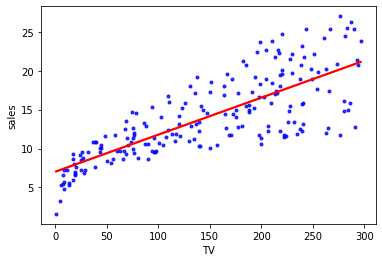

In [17]:
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

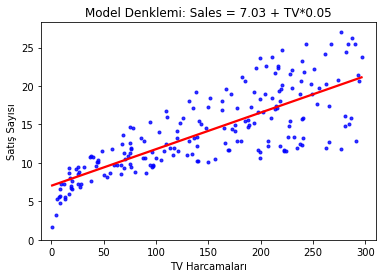

In [19]:
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")
g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [20]:
y_pred = reg_model.predict(X)

In [21]:
mean_squared_error(y, y_pred)

10.512652915656757

In [22]:
y.mean()

sales   14.02
dtype: float64

In [23]:
y.std() 

sales   5.22
dtype: float64

In [24]:
np.sqrt(mean_squared_error(y, y_pred))

3.2423221486546887

In [25]:
mean_absolute_error(y, y_pred)

2.549806038927486

In [26]:
reg_model.score(X, y)

0.611875050850071